In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Question No 1(B):
Soft Margin SVM using CVXPY formulated as hing loss plus penalty

In [29]:
def soft_margin_SVM(X,Y):
    #workingg
    #X=df.iloc[:,[0,2]].values
    #Y=df.iloc[:,-1].values
    #w1,b1=hard_margin_SVM(X,Y)
    #print(Y)
    n=2
    w2 = cp.Variable(n)
    b2 = cp.Variable()
    ei=cp.Variable()
    reg = cp.norm(w2, 2)+sum(ei)
    #loss =
    obj=cp.Minimize(reg)
    constraints=[(cp.mul_elemwise(Y, X*w2 - b2))>=(1-ei)]
    prob2=cp.Problem(obj,constraints)
    prob2.solve()
    print(w2.value)
    #print(constraints[0].dual_value)
    #print(b.value)
    #print("optimal (x - y >= 1) dual variable", constraints[1].dual_value)
    #print("x - y value:", (x - y).value)
    return w2,b2,ei

# 1.b i)

In [48]:
import autograd
def SVM_autograd(X,Y):
    #workingg
    #X=df.iloc[:,[0,2]].values
    #Y=df.iloc[:,-1].values
    #w1,b1=hard_margin_SVM(X,Y)
    #print(Y)
    X,Y=autograd(),1
    n=2
    w2 = cp.Variable(n)
    b2 = cp.Variable()
    ei=cp.Variable()
    reg = cp.norm(w2, 2)+sum(ei)
    #loss =
    obj=cp.Minimize(reg)
    constraints=[(cp.mul_elemwise(Y, X*w2 - b2))>=(1-ei)]*Y
    prob2=cp.Problem(obj,constraints)
    prob2.solve()
    print(w2.value)
    #print(constraints[0].dual_value)
    #print(b.value)
    #print("optimal (x - y >= 1) dual variable", constraints[1].dual_value)
    #print("x - y value:", (x - y).value)
    return w2,b2,ei

## 1(b) (ii)


In [19]:
df2 = pd.read_csv("iris.csv") # Import data
temp2=df2.iloc[:,-1]
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Labeling the dataset

In [20]:
df2.drop('petal_width',axis=1,inplace=True)
df2.drop('petal_length',axis=1,inplace=True)
df2.head()

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


In [21]:
temp2=df2.iloc[:,-1]
temp2=temp2[:]
#print(temp)

In [31]:
df2.species[df2.species=='setosa']=-1
df2.species[df2.species=='virginica']=1
df2.species[df2.species=='versicolor']=-1
df2.head(5)

C:\Users\SREEJITH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\SREEJITH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\SREEJITH\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,sepal_length,sepal_width,species
0,5.1,3.5,-1
1,4.9,3.0,-1
2,4.7,3.2,-1
3,4.6,3.1,-1
4,5.0,3.6,-1


In [32]:
df3 = pd.read_csv("iris.csv") # Import data
df3.species[df3.species=='setosa']='Not-virginica'
df3.species[df3.species=='virginica']='Iris-virginica'
df3.species[df3.species=='versicolor']='Not-virginica'


C:\Users\SREEJITH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\SREEJITH\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SREEJITH\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


# Applying on IRIS Dataset 
with SL and SW and IV

In [33]:
X2=df2.iloc[:,0:2].values
Y2=df2.iloc[:,-1].values
w3,b3,e3=soft_margin_SVM(X2,Y2)
print(w3.value,b3.value,e3.value)

[[2.86942425e-15]
 [8.16854144e-16]]
[[2.86942425e-15]
 [8.16854144e-16]] 9.900482992495394e-13 1.0000000000003724


In [35]:
#workingg
#X=df.iloc[:,[0,2]].values
#Y=df.iloc[:,-1].values
#w1,b1=hard_margin_SVM(X,Y)
#print(Y)
n=2
w2 = cp.Variable(n)
b2 = cp.Variable()
ei=cp.Variable()
reg = cp.norm(w2, 2)+0.5*sum(ei)
#loss =
obj=cp.Minimize(reg)
constraints=[(cp.mul_elemwise(Y2, X2*w2 - b2))>=(1-ei)]
prob2=cp.Problem(obj,constraints)
prob2.solve()
print(w2.value,b2.value,ei.value)
dual_vals2=(constraints[0].dual_value)
#print(b.value)
#print("optimal (x - y >= 1) dual variable", constraints[1].dual_value)
#print("x - y value:", (x - y).value)

[[-2.95228863e-14]
 [-3.49603948e-14]] -1.4288458117936538e-13 1.0000000000000702


In [40]:
indxs2=sorted(range(len(dual_vals2)), key=lambda i: dual_vals2[i], reverse=True)[:20]
print(dual_vals2[indxs2])

[[0.00755078]
 [0.00599199]
 [0.00584142]
 [0.00570017]
 [0.00570017]
 [0.00569818]
 [0.00556251]
 [0.00546791]
 [0.00544233]
 [0.00534919]
 [0.00533152]
 [0.00524012]
 [0.00519952]
 [0.0051621 ]
 [0.00515215]
 [0.00514669]
 [0.00514082]
 [0.00511139]
 [0.00510189]
 [0.00506613]]


[[-2.95228863e-14]
 [-3.49603948e-14]] -1.4288458117936538e-13 1.0000000000000702


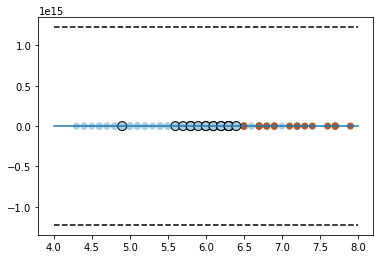

In [42]:
print(w2.value,b2.value,ei.value)
a1=w3[0].value
a2=w3[1].value
e=e3.value
b=b3.value
x1=np.linspace(4, 8, 30)
x2=(-a1*x1)/a2
x3=((-a1*x1+b-e))/a2
x4=((-a1*x1-b+e))/a2
#print(e)
plt.plot(x1,x2)
plt.plot(x1,x3,'k--')
plt.plot(x1,x4,'k--')
plt.scatter(X2[:, 0], X2[:, 1], c=Y2, cmap=plt.cm.Paired)
plt.scatter(X2[indxs2, 0], X2[indxs2, 1], c=Y2[indxs2], cmap=plt.cm.Paired,s=80, facecolors='none',edgecolors='k')
plt.show()

# 1 .b iii)

In [71]:
# Load data with only two classes and two features
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target[:150]
x2= [4.6,8]
y2 = [2.75,5.55]
#print(y)
y1 = []
for i in y:
  if i==0:
    y1.append(0)
  if i==1:
    y1.append(0)
  if i == 2:
    y1.append(1)
y = np.array(y1)
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# Create support vector classifier
model = svm.SVC(kernel='linear')
#print(y)
# Train model
model.fit(X_std, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [72]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]
X1 = [4.6,8]
y1= [2,4.8]
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

In [74]:
df = pd.DataFrame(X)
df['Type'] = y

In [75]:
ingredients = df[[0,1]].as_matrix()
type_label = np.where(df['Type']==0, 0, 1)

xx1,yy1 = [4.6,8],[2.375,5.175]
# Feature names
recipe_features =['0','1']
recipe_features

C:\Users\SREEJITH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


['0', '1']

In [76]:
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallls to the separating hyperplane that pass through the support vectors
beta_vals = model
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

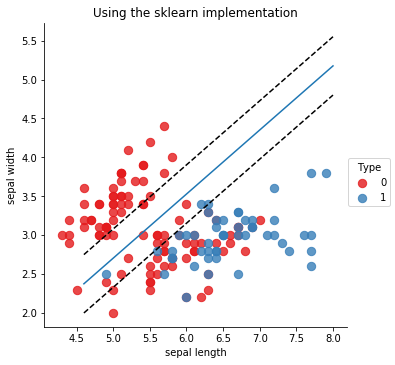

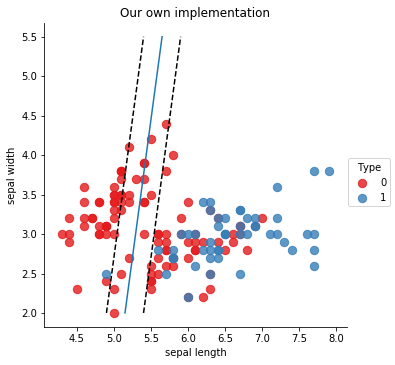

In [80]:
df.columns = ['length','width','Type']
dx1,dx2,dx3 = [5.4,5.9],[4.9,5.4],[5.15,5.65]
dy1,dy2,dy3 = [2,5.5],[2,5.5],[2,5.5]
# Look at the margins and support vectors
sns.lmplot('length', 'width', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');
plt.plot(xx1,yy1)
plt.plot(X1,y1,'k--')
plt.plot(x2,y2,'k--')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title("Using the sklearn implementation")
plt.show()
# Look at the margins and support vectors
sns.lmplot('length', 'width', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.scatter(beta_vals.support_vectors_[:, 0], beta_vals.support_vectors_[:, 1],
            s=80, facecolors='none');
plt.plot(dx1,dy1,'k--')
plt.plot(dx2,dy1,'k--')
plt.plot(dx3,dy3)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title("Our own implementation")
plt.show()


# The scikit learn implementation of SVM provides a better fit

# 1.b(iv)

(900, 2)
(900,)


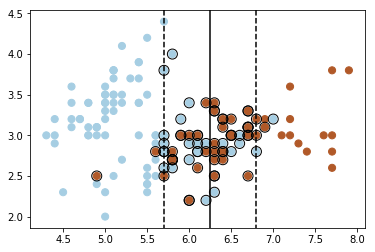

(900, 2)
(900,)


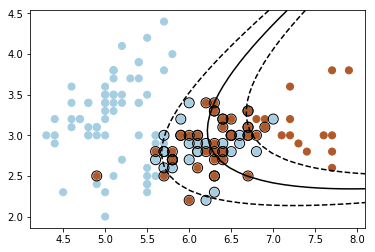

(900, 2)
(900,)


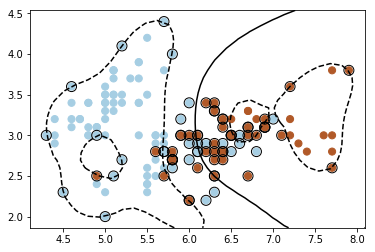

In [47]:
X=df2.iloc[:,0:2]
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X,df3.iloc[:,-1])
    plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1], c=temp2, s=50, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    print(xy.shape)
    Z = clf.decision_function(xy)
    print(Z.shape)
    Z=Z.reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=1,
              linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
              linewidth=1, facecolors='none', edgecolors='k')
    plt.show()


In [82]:
xx

array([30.        , 30.6122449 , 31.2244898 , 31.83673469, 32.44897959,
       33.06122449, 33.67346939, 34.28571429, 34.89795918, 35.51020408,
       36.12244898, 36.73469388, 37.34693878, 37.95918367, 38.57142857,
       39.18367347, 39.79591837, 40.40816327, 41.02040816, 41.63265306,
       42.24489796, 42.85714286, 43.46938776, 44.08163265, 44.69387755,
       45.30612245, 45.91836735, 46.53061224, 47.14285714, 47.75510204,
       48.36734694, 48.97959184, 49.59183673, 50.20408163, 50.81632653,
       51.42857143, 52.04081633, 52.65306122, 53.26530612, 53.87755102,
       54.48979592, 55.10204082, 55.71428571, 56.32653061, 56.93877551,
       57.55102041, 58.16326531, 58.7755102 , 59.3877551 , 60.        ])